In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.datasets import mnist, cifar10
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization, ZeroPadding2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.regularizers import l2
from tensorflow.keras import regularizers
Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001))
Dense(128, activation='relu', kernel_regularizer=l2(0.001))

In [30]:
import os

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.8
                                   ) # initilization of ImagedataGenerator

In [7]:
training_set = train_datagen.flow_from_directory("/kaggle/input/deepfake-and-real-images/Dataset/Train/",
                                                 target_size = (256,256),
                                                 batch_size = 32, class_mode='binary',subset='training')

Found 28002 images belonging to 2 classes.


In [8]:
testing_set = train_datagen.flow_from_directory("/kaggle/input/deepfake-and-real-images/Dataset/Test/",
                                                 target_size = (256,256),
                                                 batch_size = 32, class_mode='binary',subset='training')

Found 2182 images belonging to 2 classes.


In [6]:
m=os.listdir("/kaggle/input/rvf10k/rvf10k/train")
m

['fake', 'real']

In [9]:
training_set[0][0][0]

array([[[0.8941177 , 0.9333334 , 0.8980393 ],
        [0.8941177 , 0.9333334 , 0.8980393 ],
        [0.8941177 , 0.9333334 , 0.8980393 ],
        ...,
        [0.8941177 , 0.9333334 , 0.89019614],
        [0.8941177 , 0.9333334 , 0.89019614],
        [0.8941177 , 0.9333334 , 0.89019614]],

       [[0.8941177 , 0.9333334 , 0.8980393 ],
        [0.8941177 , 0.9333334 , 0.8980393 ],
        [0.8941177 , 0.9333334 , 0.8980393 ],
        ...,
        [0.8941177 , 0.9333334 , 0.89019614],
        [0.8941177 , 0.9333334 , 0.89019614],
        [0.8941177 , 0.9333334 , 0.89019614]],

       [[0.8941177 , 0.9333334 , 0.8980393 ],
        [0.8941177 , 0.9333334 , 0.8980393 ],
        [0.8941177 , 0.9333334 , 0.8980393 ],
        ...,
        [0.8941177 , 0.9333334 , 0.89019614],
        [0.8941177 , 0.9333334 , 0.89019614],
        [0.8941177 , 0.9333334 , 0.89019614]],

       ...,

       [[0.6666667 , 0.65882355, 0.7137255 ],
        [0.65882355, 0.6509804 , 0.7058824 ],
        [0.64705884, 0

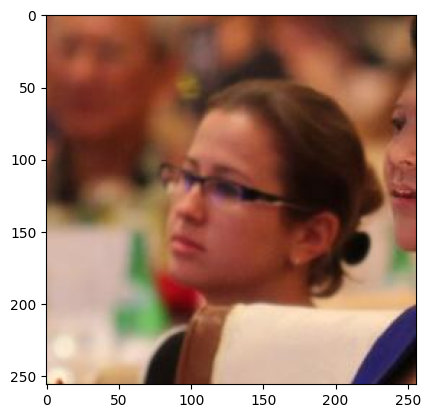

In [34]:
plt.imshow(training_set[0][0][0])
plt.show()

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=20,
          callbacks=[early_stop])
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

model.fit(..., callbacks=[early_stop, reduce_lr])
from tensorflow.keras import regularizers
Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001))

In [77]:
model1=Sequential()
model1.add(Conv2D(128, (3, 3) , activation='relu', input_shape=(256, 256, 3)))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (3, 3) ,activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(32, (3, 3) ,activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(16, (3, 3) ,activation='relu'))
model1.add(MaxPooling2D((2, 2)))

#model1.add(Conv2D(16, (3, 3),activation='relu',))
#model1.add(MaxPooling2D((2, 2)))

model1.add(Dropout(0.3))
model1.add(Flatten())

# Dense layers
model1.add(Dense(3000, activation='relu'))
model1.add(Dense(2048, activation='relu'))
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))

model1.add(Dense(1, activation='sigmoid'))  

model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 254, 254, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 127, 127, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 125, 125, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 3000)                │       9,411,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 2048)                │       6,146,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,453,033 (70.39 MB)

 Trainable params: 18,453,033 (70.39 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model1.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [79]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
)

In [80]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)  
model1.fit(training_set, epochs=50,validation_data=testing_set,callbacks=[early_stop,reduce_lr])

Epoch 1/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 130s 139ms/step - accuracy: 0.5480 - auc: 0.5717 - loss: 0.6688 - precision_3: 0.5437 - recall_3: 0.6129 - val_accuracy: 0.7599 - val_auc: 0.8799 - val_loss: 0.4907 - val_precision_3: 0.8772 - val_recall_3: 0.6002 - learning_rate: 0.0010
Epoch 2/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 115s 131ms/step - accuracy: 0.7453 - auc: 0.8231 - loss: 0.5143 - precision_3: 0.7386 - recall_3: 0.7610 - val_accuracy: 0.7929 - val_auc: 0.8933 - val_loss: 0.4297 - val_precision_3: 0.8382 - val_recall_3: 0.7221 - learning_rate: 0.0010
Epoch 3/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 115s 131ms/step - accuracy: 0.7869 - auc: 0.8717 - loss: 0.4452 - precision_3: 0.7662 - recall_3: 0.8315 - val_accuracy: 0.7557 - val_auc: 0.9068 - val_loss: 0.4286 - val_precision_3: 0.9032 - val_recall_3: 0.5688 - learning_rate: 0.0010
Epoch 4/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 114s 130ms/step - accuracy: 0.8089 - auc: 0.8961 - loss: 0.4042 - precision_3: 0.8018 - recall_3: 0.8221 - val_accuracy: 0.797

In [82]:
model1.save("fake1.h5")

In [14]:
from tensorflow.keras.models import load_model

model2 = load_model('/kaggle/input/model2/fake2.h5')

In [37]:
testing_set1 = train_datagen.flow_from_directory("/kaggle/input/deepfake-and-real-images/Dataset/Validation",
                                                 target_size = (256,256),
                                                 batch_size = 32, class_mode='binary',subset='training')

Found 7887 images belonging to 2 classes.


In [38]:
classifier.evaluate(testing_set1)

247/247 ━━━━━━━━━━━━━━━━━━━━ 112s 452ms/step - accuracy: 0.8851 - auc: 0.9516 - loss: 0.2884 - precision: 0.8705 - recall: 0.9058


[0.30004259943962097,
 0.8782806992530823,
 0.9481953978538513,
 0.8598175644874573,
 0.9050025343894958]

In [39]:
print(training_set.class_indices)

{'Fake': 0, 'Real': 1}


In [40]:
train_labels = training_set.classes
test_labels = testing_set.classes

import numpy as np
print("Unique train labels:", np.unique(train_labels, return_counts=True))
print("Unique test labels:", np.unique(test_labels, return_counts=True))


Unique train labels: (array([0, 1], dtype=int32), array([14001, 14001]))
Unique test labels: (array([0, 1], dtype=int32), array([1099, 1083]))


In [41]:
import cv2
img = cv2.imread("/kaggle/input/fakeimage/fakeimage.webp")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

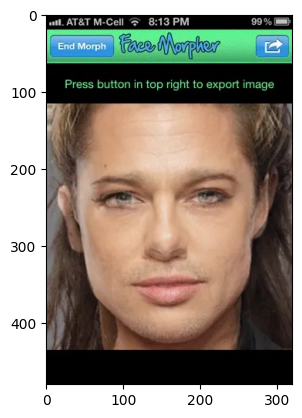

In [42]:
plt.imshow(img)
plt.show()

In [43]:
img.shape

(480, 320, 3)

In [44]:
img= cv2.resize(img, (256, 256))

img = np.reshape(img, [1,256,256,3])
img = img /255

In [46]:
prediction = classifier.predict(img)

# Result
if prediction[0][0] >= 0.5:
    print("Prediction: Real Face (%.2f%% confidence)" % (prediction[0][0] * 100))
else:
    print("Prediction: Fake Face (%.2f%% confidence)" % ((1 - prediction[0][0]) * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction: Real Face (94.02% confidence)


In [11]:
import cv2

In [100]:
import os
img_folder='/kaggle/input/fake-inputs/fake_1001/fake1001'

for i in sorted(os.listdir(img_folder)):
    img_path = os.path.join(img_folder, i)
    
    
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))


    img = np.reshape(img, [1,256,256,3])
     
    img = img / 255               
    prediction = model1.predict(img)[0][0]

    if prediction >= 0.5:
        print("Prediction: Real Face (%.2f%% confidence)" % (prediction * 100))
    else:
        print("Prediction: Fake Face (%.2f%% confidence)" % ((1 - prediction) * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Fake Face (99.77% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Fake Face (100.00% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Fake Face (99.53% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: Fake Face (100.00% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: Fake Face (95.83% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: Fake Face (99.99% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: Fake Face (99.92% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Fake Face (99.32% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: Fake Face (100.00% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Fake Face (100.00% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Fake Face (99.51% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: Fake Face (99.86% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/ste

In [11]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet', 
                      include_top=False, 
                      input_shape=(256, 256, 3))
conv_base.summary()

I0000 00:00:1748969249.959710      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748969249.960495      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Freeze all convolution blocks
for layer in conv_base.layers[:]:
    layer.trainable = False

# # Make sure you have frozen the correct layers
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)


0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool False
17 block5_conv1 False
18 block5_conv2 False
19 block5_conv3 False
20 block5_conv4 False
21 block5_pool False


In [13]:
classifier = Sequential()

classifier.add(conv_base)
classifier.add(Flatten())
#classifier.add(Dense(16384, activation='relu'))
#classifier.add(Dense(8192, activation='relu'))
#classifier.add(Dense(4096, activation='relu'))
#classifier.add(Dense(2048, activation='relu'))
classifier.add(Dense(1024, activation='relu'))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(64, activation='relu'))

classifier.add(Dropout(0.2))
classifier.add(Dense(1, activation='sigmoid'))  


In [14]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 8, 8, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      33,555,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,277,185 (207.05 MB)

 Trainable params: 34,252,801 (130.66 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [15]:
classifier.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [35]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)  
classifier.fit(training_set,validation_data=testing_set, epochs=50,callbacks=[early_stop],shuffle=True)

Epoch 1/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 376s 429ms/step - accuracy: 0.9313 - auc: 0.9822 - loss: 0.1695 - precision: 0.9290 - recall: 0.9338 - val_accuracy: 0.7447 - val_auc: 0.8980 - val_loss: 0.8264 - val_precision: 0.9443 - val_recall: 0.5162
Epoch 2/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 375s 429ms/step - accuracy: 0.9364 - auc: 0.9860 - loss: 0.1505 - precision: 0.9337 - recall: 0.9405 - val_accuracy: 0.8006 - val_auc: 0.9084 - val_loss: 0.4623 - val_precision: 0.8848 - val_recall: 0.6879
Epoch 3/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 374s 427ms/step - accuracy: 0.9445 - auc: 0.9882 - loss: 0.1366 - precision: 0.9417 - recall: 0.9489 - val_accuracy: 0.7736 - val_auc: 0.8955 - val_loss: 0.7082 - val_precision: 0.9062 - val_recall: 0.6066
Epoch 4/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 375s 428ms/step - accuracy: 0.9502 - auc: 0.9916 - loss: 0.1161 - precision: 0.9470 - recall: 0.9536 - val_accuracy: 0.7722 - val_auc: 0.9149 - val_loss: 0.5543 - val_precision: 0.9347 - val_recall: 0.5817
Epoch 5/50
876/8

In [16]:
classifier.evaluate(testing_set)

47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 706ms/step - accuracy: 0.8147 - auc: 0.8292 - loss: 2.5112 - precision: 0.8465 - recall: 0.7753


[2.582486629486084,
 0.8140000104904175,
 0.8244621753692627,
 0.8398268222808838,
 0.7760000228881836]

In [61]:
classifier.evaluate(testing_set12)

263/263 ━━━━━━━━━━━━━━━━━━━━ 135s 514ms/step - accuracy: 0.8726 - auc: 0.9120 - loss: 0.4512 - precision_4: 0.8548 - recall_4: 0.8950


[0.4420778751373291,
 0.8730952143669128,
 0.913772702217102,
 0.8542043566703796,
 0.8997619152069092]

In [62]:
classifier.evaluate(testing_set121)

140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.4108 - auc: 0.2558 - loss: 4.3073 - precision_4: 0.4480 - recall_4: 0.8291

E0000 00:00:1748431956.924158     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1748431957.186557     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


141/141 ━━━━━━━━━━━━━━━━━━━━ 77s 545ms/step - accuracy: 0.4109 - auc: 0.2559 - loss: 4.3051 - precision_4: 0.4481 - recall_4: 0.8291


[4.153066635131836,
 0.4148888885974884,
 0.26825451850891113,
 0.4533268213272095,
 0.8266666531562805]

In [36]:
classifier.save("fake2.h5")